In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Вариант 9

### Задание 1

$f_1(t) = \cos^2(20 \pi t) + \sin(10 \pi t)$

$f_2(t) = t^2 + 0.5 t$

Производная

$f_1'(t) = 2 \cos(20 \pi t)(-\sin(20 \pi t))\cdot 20 \pi + 10\pi\cos(10 \pi t) = - 20 \pi \sin(40 \pi t)+ 10\pi\cos(10 \pi t)$

$f_2'(t) = 2t + 0.5$

### Задание 2

Для функции 1 зададим промежуток, чтобы уложилось несколько периодов (будем считать по функции с наименьшей частотой):

Период $T = \dfrac{2 \pi}{\omega} = 0.2$, тогда возьмём, например, четыре периода

In [203]:
T = 0.2
time_ax = np.linspace(0, 8 * T, 700)

In [204]:
f_1 = lambda t : (np.cos(20 * np.pi * t)) ** 2 + np.sin(10 * np.pi * t)

f_1_array = f_1(time_ax)

In [205]:
analytical_derivative = lambda t : 10 * np.pi * (np.cos(10 * np.pi * t) - 2 * np.sin(40 * np.pi * t))
analyt_deriv_array = analytical_derivative(time_ax)

### По двум точкам

In [206]:
new_derivative = np.zeros((len(f_1_array)))
dt = np.diff(time_ax)[0]
for i in range(1, len(new_derivative) - 1):
    new_derivative[i] = (f_1_array[i + 1] - f_1_array[i - 1]) / (2 * dt)


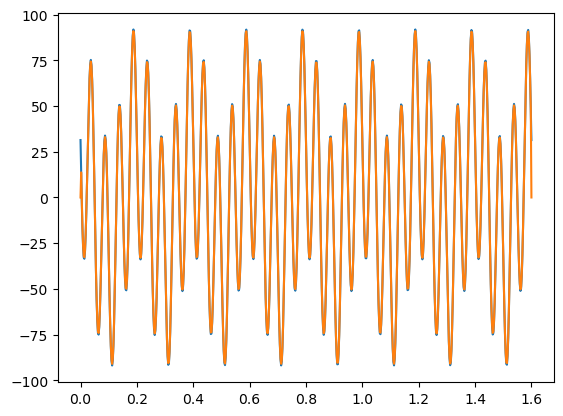

In [207]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, new_derivative)

### Через преобразование Фурье

In [208]:
f_1_fourier = np.fft.fft(f_1_array)
freq_array = 2 * np.pi * np.fft.fftfreq(len(f_1_array), dt)

fourier_derivative = np.fft.ifft(1j*freq_array*f_1_fourier)

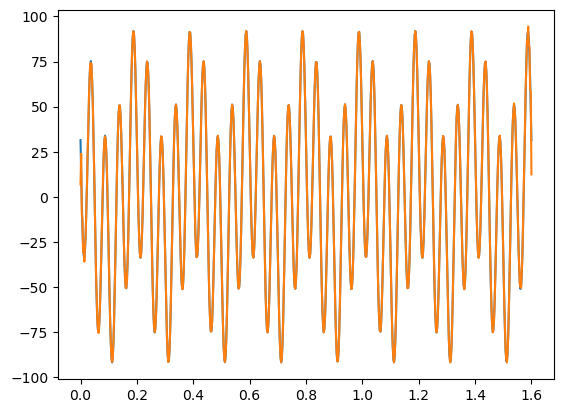

In [209]:
plt.plot(time_ax, analyt_deriv_array)
plt.plot(time_ax, fourier_derivative)